# BOOMBIKE SHARING ASSIGNMENT


### Step -1 Import Pre-requiste libraries

In [7]:
!pip install scikit-learn
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --up

In [8]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### WARNINGS #####
import warnings
warnings.filterwarnings('ignore')

##### STATSMODEL LIBRARY #####
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### SKLEARN ####
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

### Step -2 Reading and Understanding the data set

#### Loading dataset

In [9]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Checking the shape of the dataframe
bike.shape

(730, 16)

#### getting more details from the data


In [11]:
# get info 
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


  - from data info we see that dtype of the variable are not proper to we need modify the variables as required dtypes
  - Variables that needs modification are
      - instant (It is index columns, treating it as an index so we can be dropped as it will not have any significant on target variable.)
      - dteday (Year, Month, and date can be extracted from the dteday column. After which mnth, yr, dteday can be dropped.) 
      - weekday (It has numerical values like 1,2,3 .. which can be converted to categorical variable for better readibilty and understanding )
      - season (It has numerical values like 1,2,3 .. which can be converted to categorical variable for better readibilty and understanding ) 
      - weathersit (It has numerical values like 1,2,3 .. which can be converted to categorical variable for better readibilty and understanding)
      - casual (It can be ignore as the sum of casual and registered is the cnt variable.)
      - registered (It can be ignore as the sum of casual and registered is the cnt variable.)
  - Categorical varibales like holiday and working day are alredy labled hence no further data treatment needed.
    

    

In [12]:
# describe, get info for all the numberical values
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Step-3 Preparing the data for model building 
- Includes steps for EDA
    - data prepration
    - data processing
    - data visualisation
    

In [13]:
bike.shape

(730, 16)

In [14]:
# checking for the null or missing values in column data
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
#find duplicates in the dataset
bike_duplicate = bike.copy()

bike_duplicate.drop_duplicates(subset=None, inplace=True)

In [16]:
bike_duplicate.shape

(730, 16)

#### Since the duplicate dataframe shape is similar to the original dataset after dropping duplicate, this means _No Duplicates_ are present in the dataset.


In [17]:
bike["date"] = pd.DatetimeIndex(bike["dteday"]).day
bike["month"] = pd.DatetimeIndex(bike["dteday"]).month_name()
bike["year"] = pd.DatetimeIndex(bike["dteday"]).year

In [18]:
# dropping the dteday and mnth columns as we don't need them any more after above step
bike.drop(["dteday", "mnth", "instant", "casual", "registered"], axis=1, inplace=True)

In [19]:
bike.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date,month,year
0,1,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,January,2018
1,1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,February,2018
2,1,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,March,2018
3,1,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,April,2018
4,1,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,May,2018


In [20]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  date        730 non-null    int32  
 12  month       730 non-null    object 
 13  year        730 non-null    int32  
dtypes: float64(4), int32(2), int64(7), object(1)
memory usage: 74.3+ KB


#### Now checking on weekday as the value is numeric and data dictionary is not having enough info about the weekday column. 
#### So need to find out the day from which the week starts weather it is Sunday or Monday.

In [21]:
bike.groupby("weekday").sum()["workingday"]

weekday
0      0
1     90
2    103
3    102
4    102
5    102
6      0
Name: workingday, dtype: int64

- As per the above detais, we found that days starts from Sunday which is encoded as 0 and Saturday as end day which is encoded as 6.

In [22]:
#  converting  season, weathersit, weekday columns to categorical columns

# Converting variables into categorical type 
bike[['season','weathersit','month']] = bike[['season','weathersit','month']].astype('category')

# bike['season'] = bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# bike['weathersit'] = bike['weathersit'].map({1: "Clear/partly cloudy", 2: "Mist and Cloudy", 3: "Light Snow/Rain", 4: "Heavy Snow/Rain" })
# bike['weekday'] = bike['weekday'].map({0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"})

col_dict = {"season" :  {1: "spring", 2: "summer", 3: "fall", 4: "winter"},
            "weathersit" : {1: "Clear/partly cloudy", 2: "Mist and Cloudy", 3: "Light Snow/Rain", 4: "Heavy Snow/Rain" },
            "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}}

for col in col_dict.keys():
    bike[col] = bike[col].apply(lambda x : col_dict[col][x])

bike.head()


,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date,month,year
0,spring,0,0,Saturday,0,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,January,2018
1,spring,0,0,Sunday,0,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,February,2018
2,spring,0,0,Monday,1,Clear/partly cloudy,8.050924,9.47025,43.7273,16.636703,1349,1,March,2018
3,spring,0,0,Tuesday,1,Clear/partly cloudy,8.200000,10.60610,59.0435,10.739832,1562,1,April,2018
4,spring,0,0,Wednesday,1,Clear/partly cloudy,9.305237,11.46350,43.6957,12.522300,1600,1,May,2018


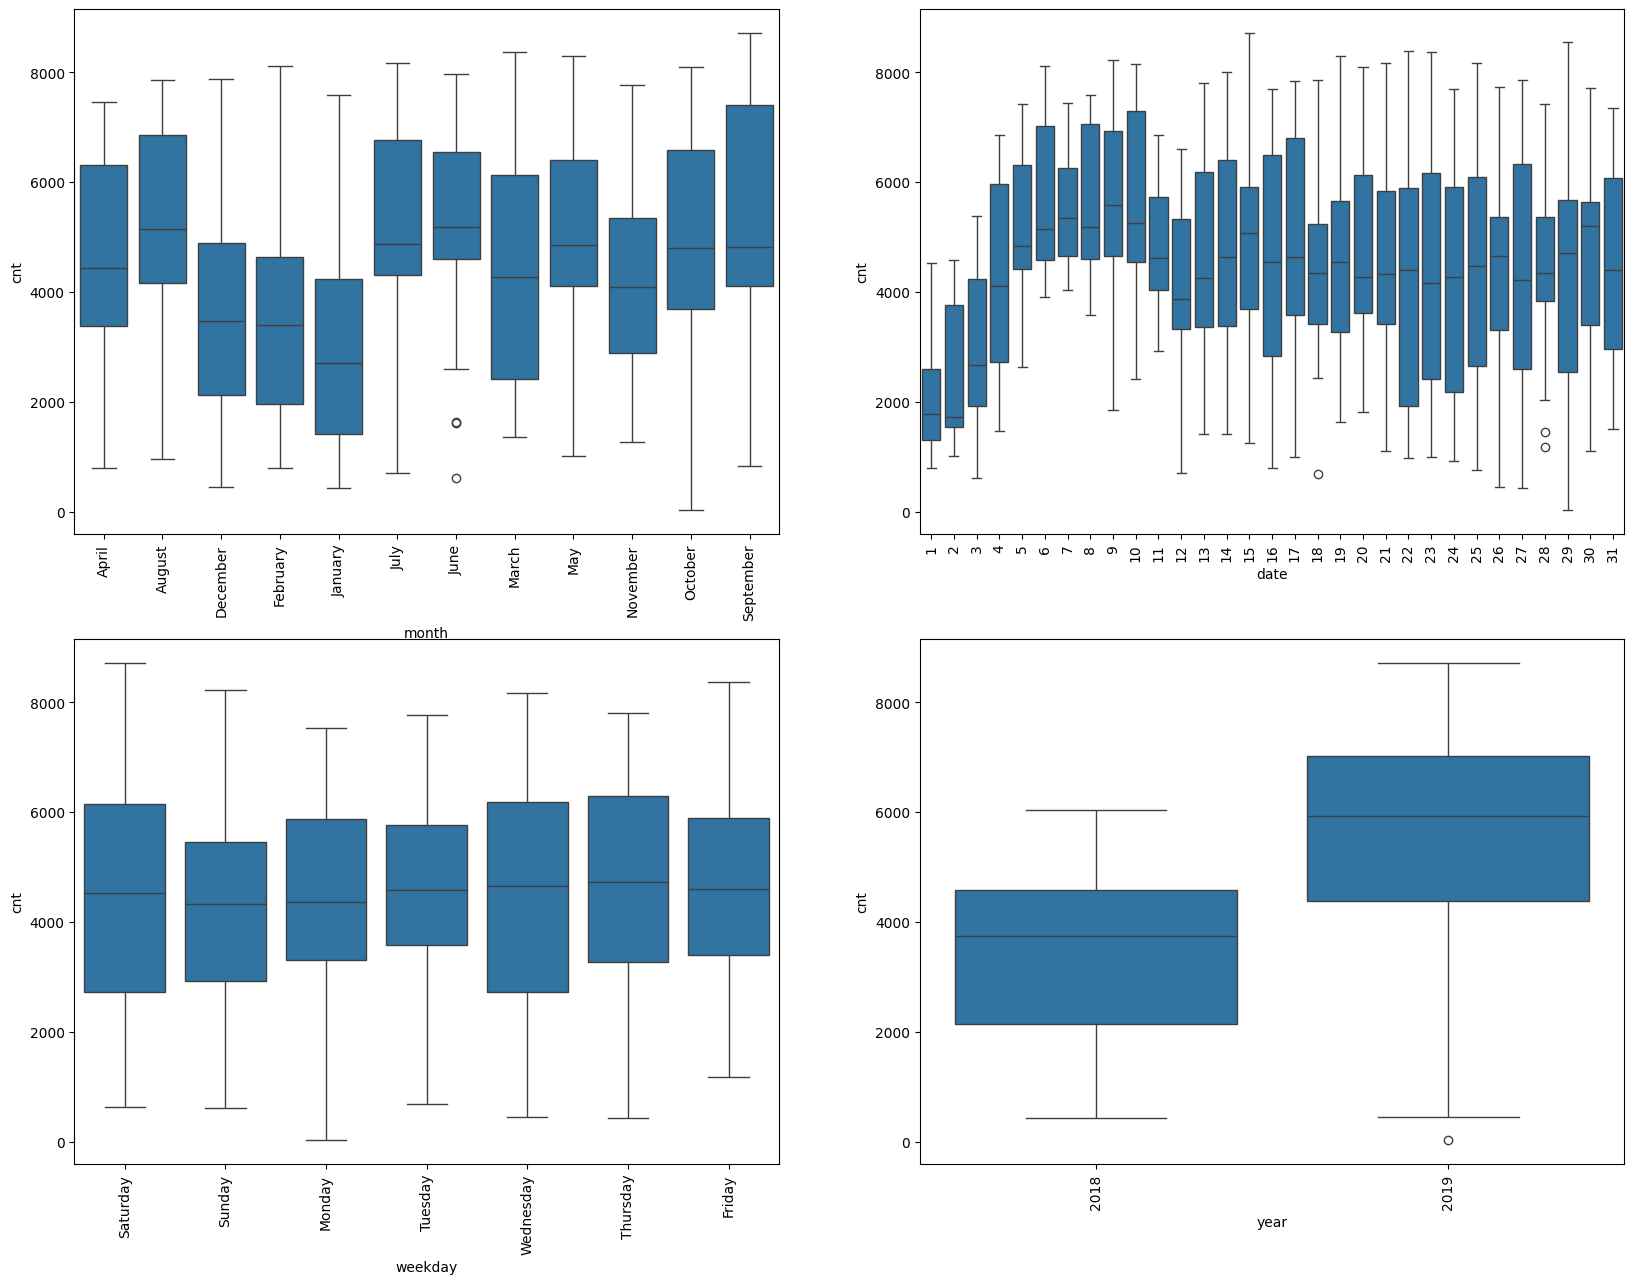

In [23]:
# Visualising categorical variables like date, month, weekday using boxblot

fig = plt.figure(figsize=(20,15))

plt.subplot(2, 2, 3)
sns.boxplot(x='weekday', y='cnt', data=bike)
plt.xticks(rotation=90)

plt.subplot(2, 2, 2)
sns.boxplot(x='date', y='cnt', data=bike)
plt.xticks(rotation=90)

plt.subplot(2, 2, 1)
sns.boxplot(x='month', y='cnt', data=bike)
plt.xticks(rotation=90)

plt.subplot(2, 2, 4)
sns.boxplot(x='year', y='cnt', data=bike)
plt.xticks(rotation=90)

plt.show()

In [24]:
# Creating function for comparing yearly trend between different categorical variables and counts 

def plotting_cat_col(column, vs_col):
    fig = plt.figure(figsize=(20,12))
    plt.subplot(2, 2, 1)
    sns.barplot(data=bike, x=column, y=vs_col)
    plt.xticks(rotation=90)
    
    plt.subplot(2, 2, 2)
    sns.barplot(data=bike, x=column, y=vs_col, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.xticks(rotation=90)
    plt.show()




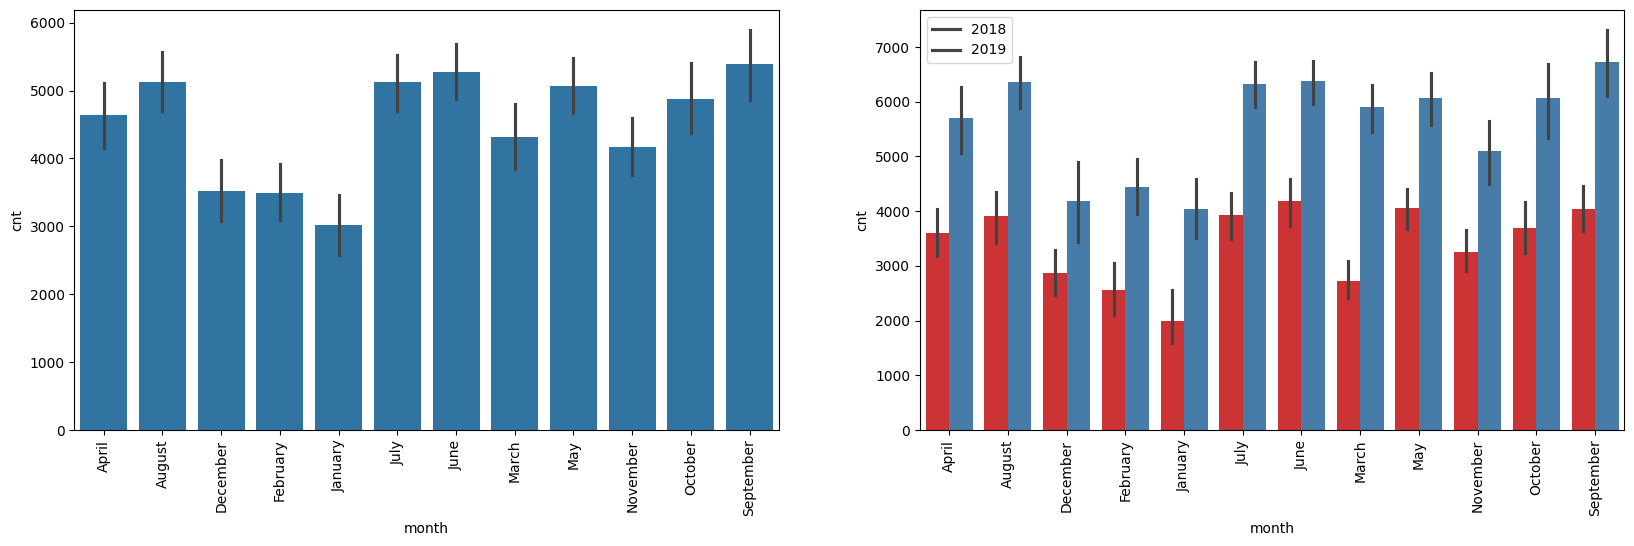

In [25]:
# plotting month vd cnt

plotting_cat_col(column='month', vs_col='cnt')

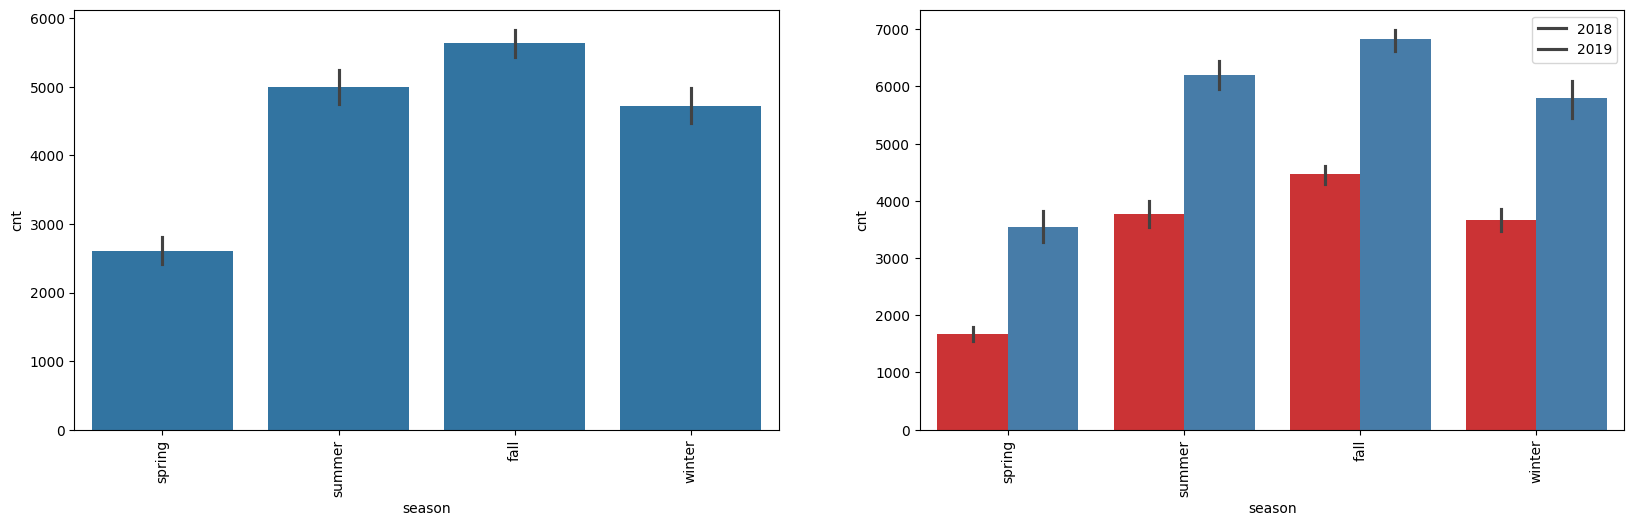

In [26]:
# plotting season vd cnt

plotting_cat_col(column='season', vs_col='cnt')

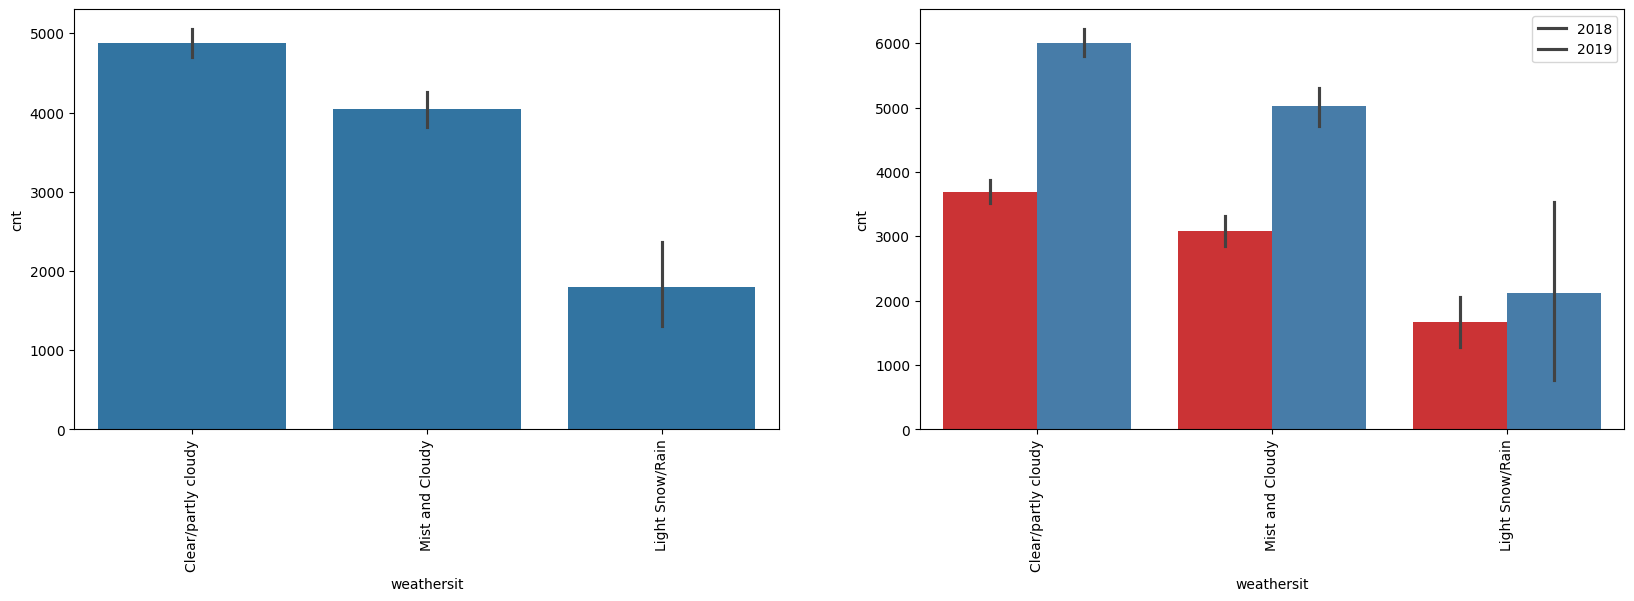

In [27]:
# plotting season vd cnt

plotting_cat_col(column='weathersit', vs_col='cnt')

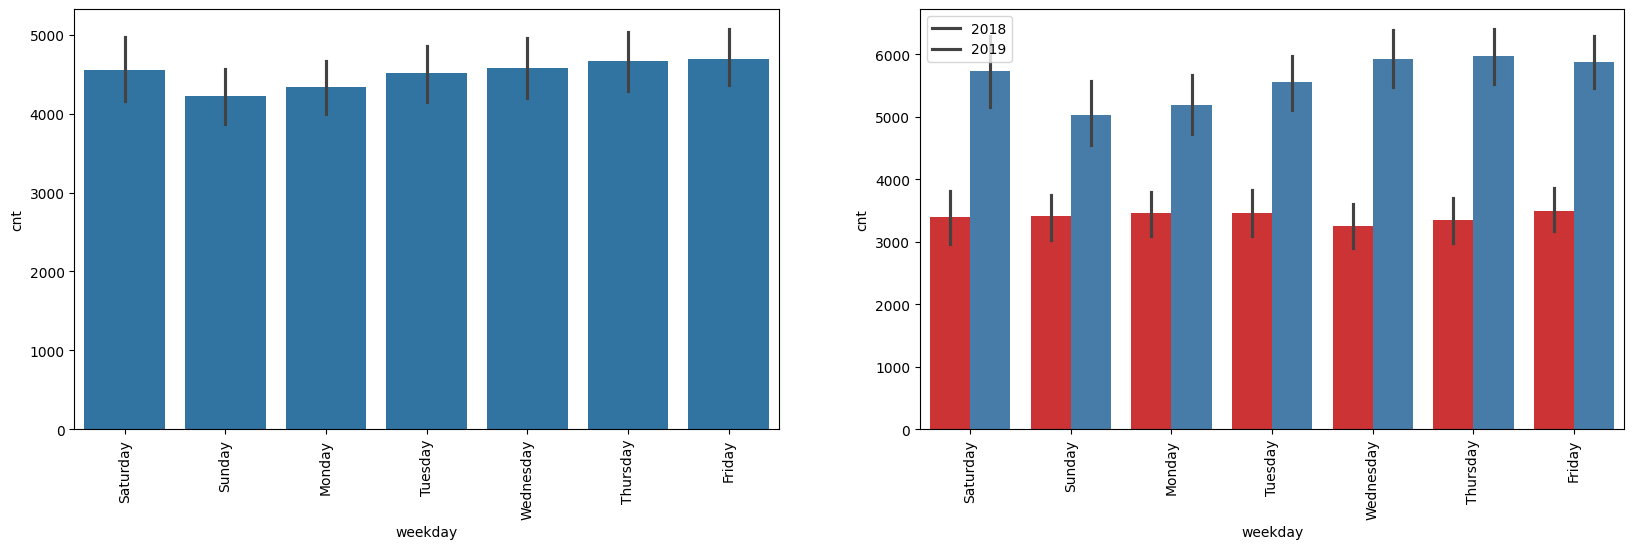

In [28]:
# plotting visualization for weekday column

plotting_cat_col('weekday', vs_col='cnt')

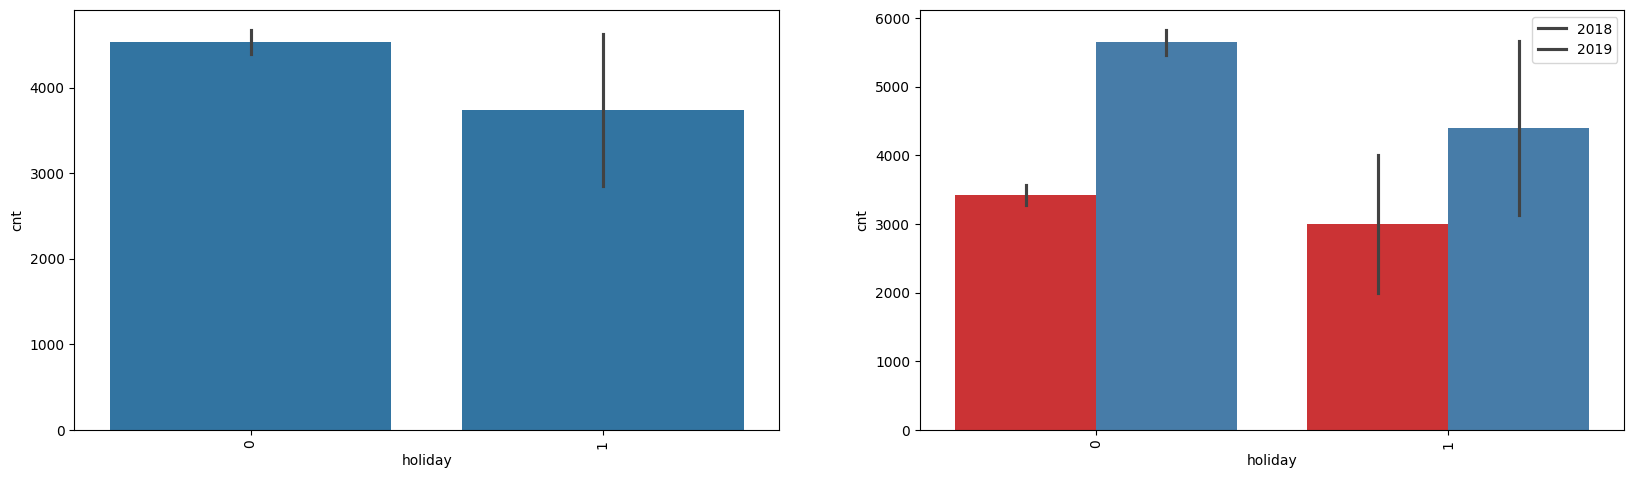

In [29]:
# plotting visualization for holiday column

plotting_cat_col('holiday', vs_col='cnt')

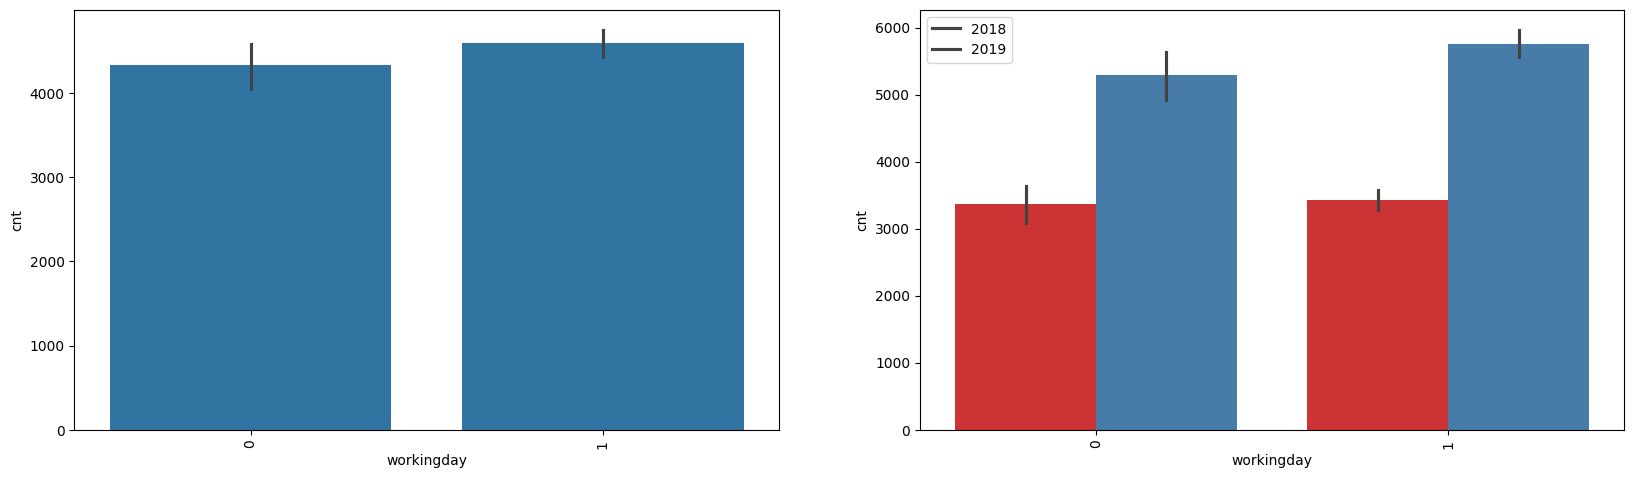

In [30]:
# plotting visualization for workingday column
plotting_cat_col('workingday', vs_col='cnt')


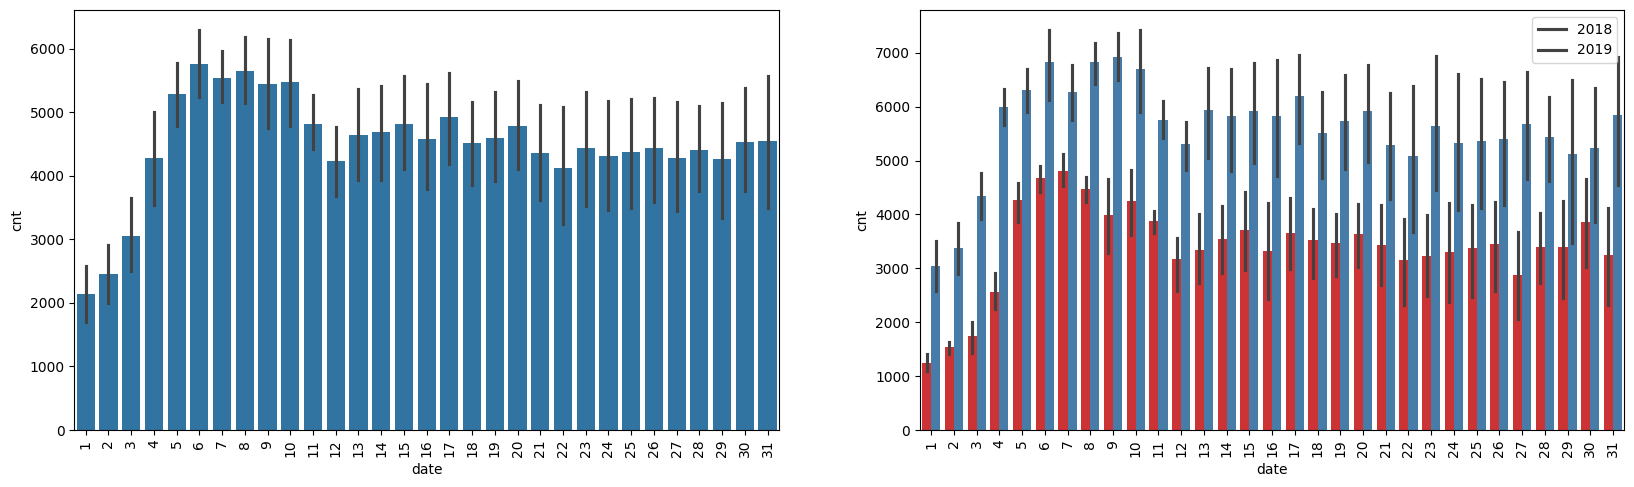

In [31]:
# plotting visualization for date column
plotting_cat_col('date', vs_col='cnt')

As per the above bar chart we can clearly observ demand for the bike based on season and weather.

- We can conclude that the bikes are more rented during fall season and when when weather is Clear/ Partly Cloudy
- Also we can conclude that the people are less likely to rent a bike during Spring and Light Snow/ Rain
- Where as people avoid to rent a bike during Heavy Snow/ Rain.
- Months like January, February, November and December are having less demand as compare to the other months.
- Dates from mid of first week to mid of second weeks showing more demand comparatively with other days and same the demand is looking rising in last 2 days of the month.
- Compartively the demand on weekdys look similar except days like Sunday and Monday
- Clearly the year comparision shows for each variable the demand in 2019 was quite highet than that of 2018.


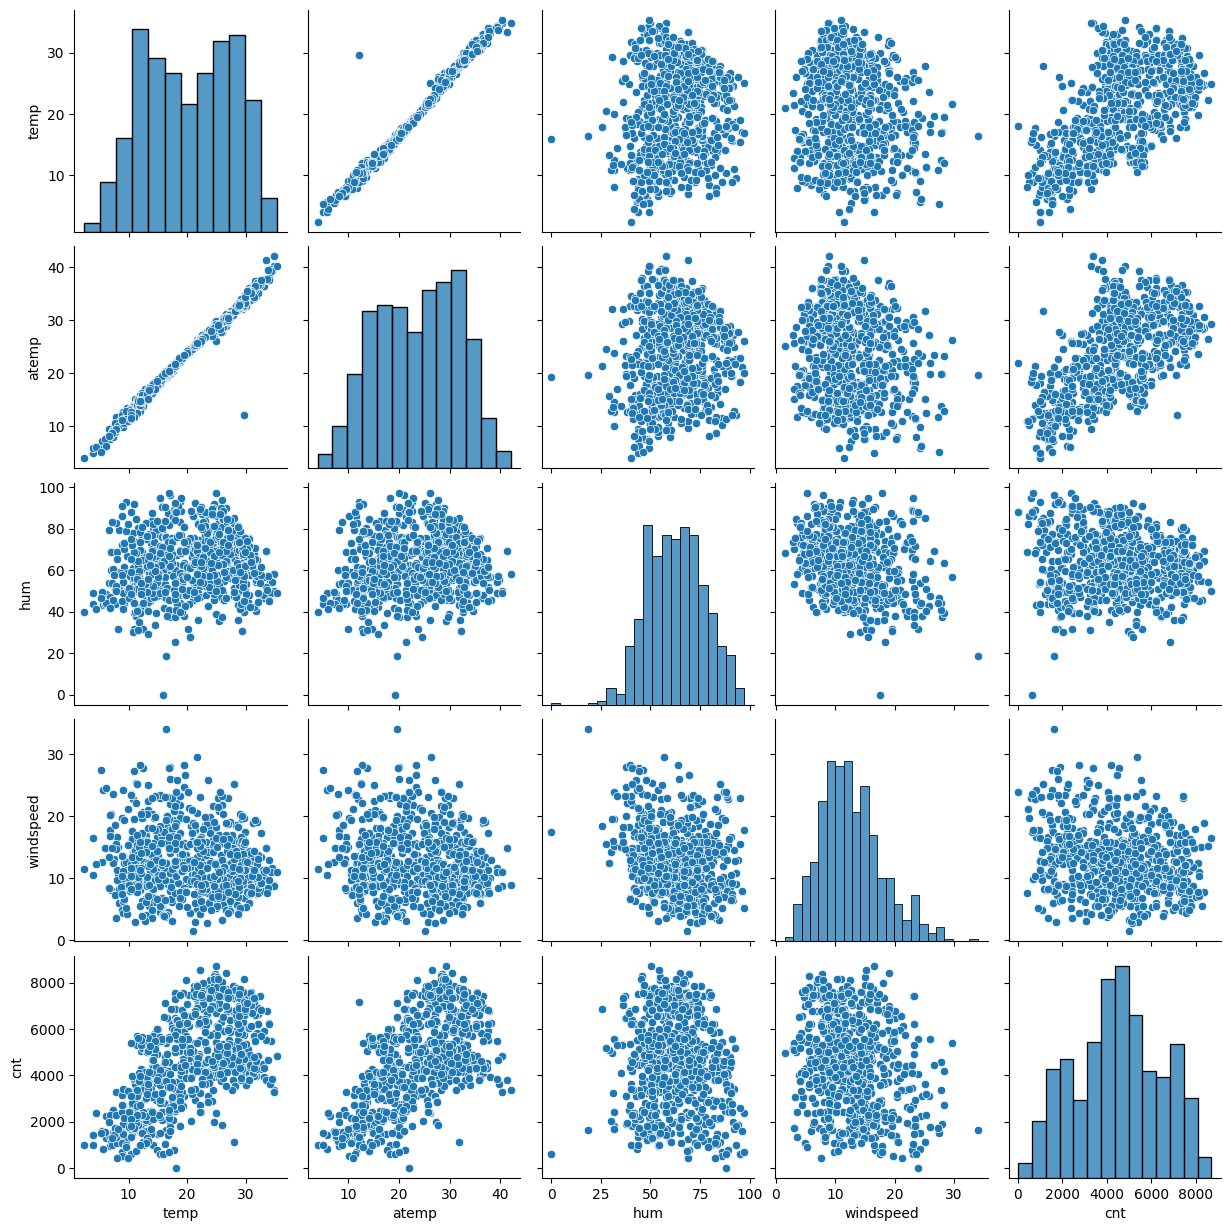

In [32]:
# checking inference for numnerical columns.

numerical_var = ["temp", "atemp", "hum", "windspeed", "cnt"]

sns.pairplot(data=bike, vars=numerical_var)
plt.show()

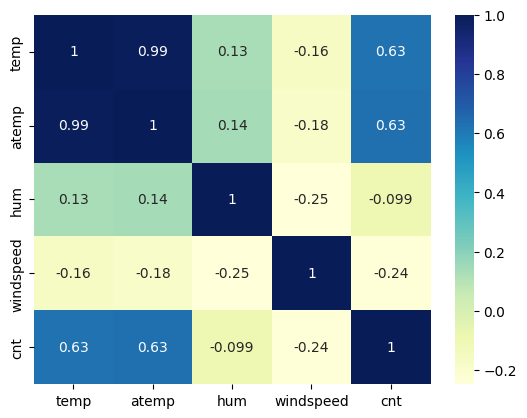

In [33]:
#using heatmap let's find the co-relation between the variable of the dataframe.
sns.heatmap(bike[numerical_var].corr(), annot=True, cmap="YlGnBu")
plt.show()

As per the above heatmap we can infer that temp and atemp are having high linear relationship, hence we can take them as a features for model due to multicolinearity.  So we use any one of the features


#### Step-5 Data prepration for Model 


In [34]:
# Adding Dummy variable

In [35]:
month_new = pd.get_dummies(bike['month'], drop_first=True, dtype='uint8')
weekdays_new = pd.get_dummies(bike['weekday'], drop_first=True, dtype='uint8')
weathersit_new=pd.get_dummies(bike['weathersit'], drop_first=True, dtype='uint8')
seasons_new=pd.get_dummies(bike['season'], drop_first=True, dtype='uint8')

In [36]:
# Concating bike dataframe with the above created dummy variables
bike = pd.concat([bike, month_new, weekdays_new, weathersit_new, seasons_new], axis=1)

In [37]:
bike.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist and Cloudy,Light Snow/Rain,summer,fall,winter
0,spring,0,0,Saturday,0,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,...,1,0,0,0,0,1,0,0,0,0
1,spring,0,0,Sunday,0,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,...,0,1,0,0,0,1,0,0,0,0
2,spring,0,0,Monday,1,Clear/partly cloudy,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,spring,0,0,Tuesday,1,Clear/partly cloudy,8.200000,10.60610,59.0435,10.739832,...,0,0,0,1,0,0,0,0,0,0
4,spring,0,0,Wednesday,1,Clear/partly cloudy,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,1,0,0,0,0,0


In [38]:
bike.shape

(730, 36)

In [39]:
# dropping the redundant columns left after dummy variable creation
bike.drop(['atemp', 'season','month', 'year', 'date', 'weekday','weathersit'], axis = 1, inplace = True)


In [40]:
bike.shape

(730, 29)

In [41]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   hum              730 non-null    float64
 5   windspeed        730 non-null    float64
 6   cnt              730 non-null    int64  
 7   August           730 non-null    uint8  
 8   December         730 non-null    uint8  
 9   February         730 non-null    uint8  
 10  January          730 non-null    uint8  
 11  July             730 non-null    uint8  
 12  June             730 non-null    uint8  
 13  March            730 non-null    uint8  
 14  May              730 non-null    uint8  
 15  November         730 non-null    uint8  
 16  October          730 non-null    uint8  
 17  September       

#### Step -6 Split Train Test

In [42]:
#Train Test split with 70:30 ratio

df_train ,df_test = train_test_split(bike, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [43]:
# Rescaling the numnerical variable using MinMaxScaler
scaler = MinMaxScaler()

In [44]:
# Fit on data
num_var = ["temp", "hum", "windspeed", "cnt"]
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_test[num_var] = scaler.transform(df_test[num_var])

In [45]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist and Cloudy,Light Snow/Rain,summer,fall,winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,1,0,1,0,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [46]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist and Cloudy,Light Snow/Rain,summer,fall,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.088235,0.084314,0.078431,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412,0.247059,0.262745,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.283915,0.278131,0.269113,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124,0.431725,0.440557,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Training the Model

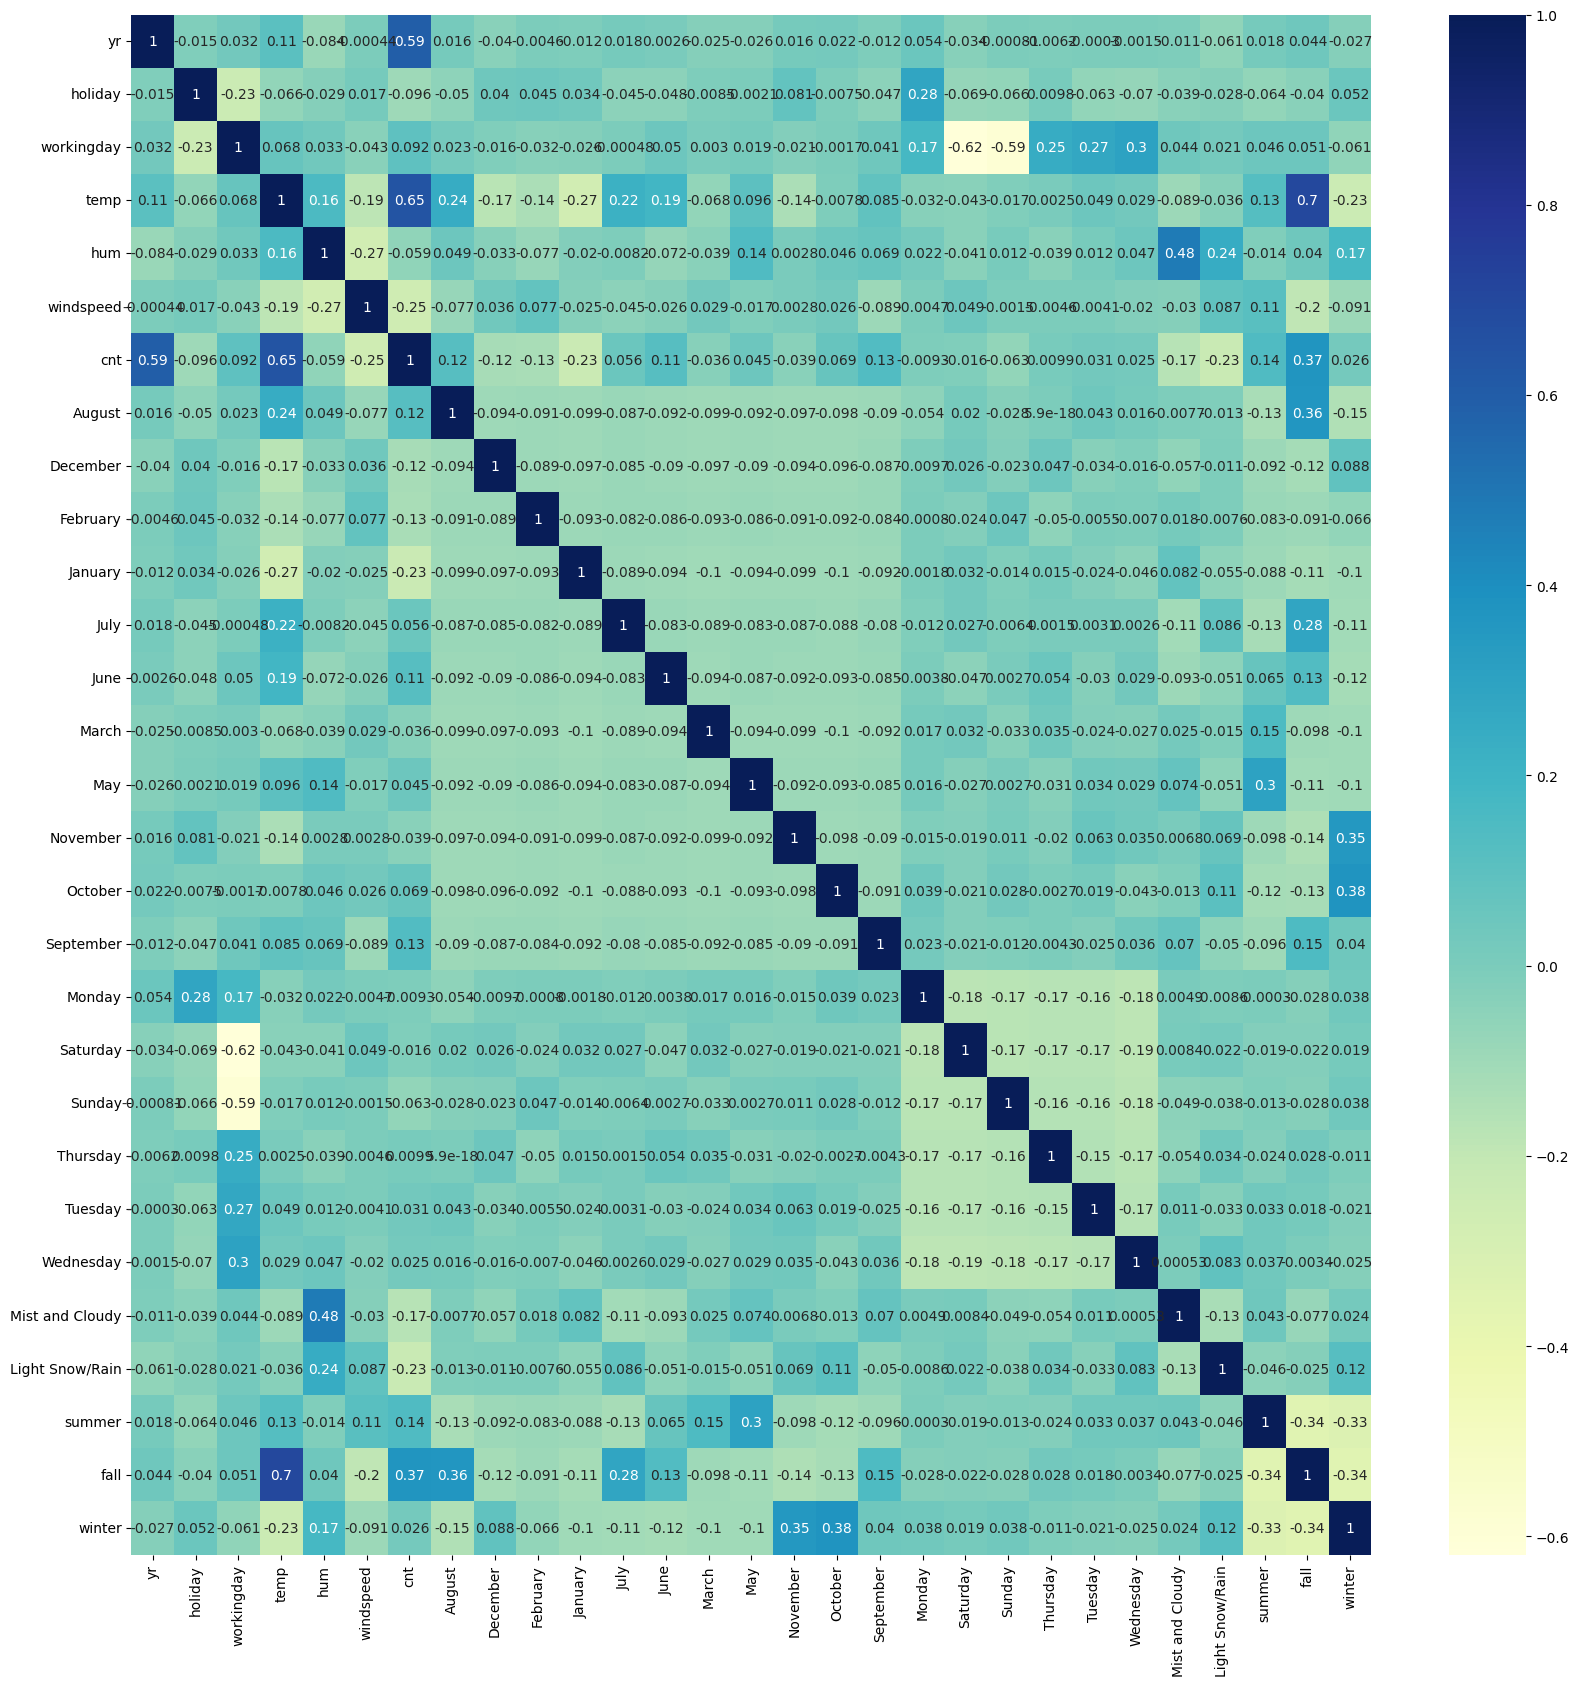

In [47]:
plt.figure(figsize= (20,20))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()


#### Building Model using RFE

In [48]:
# Building the Linear Model
y_train = df_train.pop('cnt')
X_train = df_train

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
#Let's reduce the number of features/Variables using automated way
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [51]:
# Gathering the columns selected by RFE
col = X_train.columns[rfe.support_]
print(col)


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'January',
       'July', 'Saturday', 'Sunday', 'Mist and Cloudy', 'Light Snow/Rain',
       'summer', 'fall', 'winter'],
      dtype='object')


In [52]:
# Gathering the rejected columns list
X_train.columns[~rfe.support_]


Index(['August', 'December', 'February', 'June', 'March', 'May', 'November',
       'October', 'September', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [53]:
# VIF function to calculate VIF of the  variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [54]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [55]:
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,31.84
8,Saturday,7.91
9,Sunday,7.73
13,fall,4.81
3,temp,3.60
12,summer,2.60
1,holiday,2.16
14,winter,1.96
4,hum,1.88
10,Mist and Cloudy,1.57


Getting high VIF value for 'workingday'. Dropping it help us to get the understanding 

In [56]:
#Model-1
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.7
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          3.32e-184
Time:                        22:23:39   Log-Likelihood:                 500.46
No. Observations:                 510   AIC:                            -970.9
Df Residuals:                     495   BIC:                            -907.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1578      0.023     

In [57]:
# Dropping the features showing high VIF
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,23.11
3,hum,16.53
12,fall,6.51
4,windspeed,3.69
11,summer,3.45
13,winter,2.59
9,Mist and Cloudy,2.16
0,yr,2.03
5,January,1.23
7,Saturday,1.23


In [58]:
# Model-2
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.7
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          3.32e-184
Time:                        22:23:39   Log-Likelihood:                 500.46
No. Observations:                 510   AIC:                            -970.9
Df Residuals:                     495   BIC:                            -907.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2295      0.028     

As the VIF for temp is high. 
 - dropping temp variable reduces the R2-square value too. So dropping 'hum = humidity' variable in order to maintaine the R2 value. 

In [59]:
# Dropping the features showing high VIF
X_train_new = X_train_new.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,14.53
11,fall,6.25
10,summer,3.44
3,windspeed,3.41
12,winter,2.45
0,yr,2.03
8,Mist and Cloudy,1.51
6,Saturday,1.22
5,July,1.20
7,Sunday,1.20


In [60]:
#model-3
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.9
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          5.69e-183
Time:                        22:23:39   Log-Likelihood:                 494.78
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     496   BIC:                            -902.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1584      0.018     

In [61]:
# Dropping the features showing high p-value
X_train_new = X_train_new.drop(['Saturday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,14.48
10,fall,6.25
9,summer,3.44
3,windspeed,3.34
11,winter,2.44
0,yr,2.03
7,Mist and Cloudy,1.51
5,July,1.20
6,Sunday,1.17
4,January,1.13


In [62]:
# Model-4
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.5
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          7.02e-184
Time:                        22:23:40   Log-Likelihood:                 494.17
No. Observations:                 510   AIC:                            -962.3
Df Residuals:                     497   BIC:                            -907.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1607      0.018     

In [63]:
# Dropping the features showing high p-value
X_train_new = X_train_new.drop(['January'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,14.40
9,fall,6.17
8,summer,3.37
3,windspeed,3.29
10,winter,2.39
0,yr,2.02
6,Mist and Cloudy,1.48
4,July,1.20
5,Sunday,1.17
7,Light Snow/Rain,1.09


In [64]:
# Model-5
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.5
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          3.35e-184
Time:                        22:23:40   Log-Likelihood:                 492.12
No. Observations:                 510   AIC:                            -960.2
Df Residuals:                     498   BIC:                            -909.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1488      0.017     

In [65]:
# Dropping 'fall' variable as seems to be co-related with temp.
X_train_new = X_train_new.drop(['fall'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.69
3,windspeed,3.06
0,yr,2.00
8,summer,1.56
6,Mist and Cloudy,1.48
9,winter,1.41
4,July,1.20
5,Sunday,1.16
7,Light Snow/Rain,1.09
1,holiday,1.04


In [66]:
# Model-6
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     235.5
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          8.37e-182
Time:                        22:23:40   Log-Likelihood:                 483.61
No. Observations:                 510   AIC:                            -945.2
Df Residuals:                     499   BIC:                            -898.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1344      0.017     

#### Now we can infer that above `model lr_6` seems to have low multicolinearity between the predictors and the p-values for all the predictors.
#### We can called the overall model is significant. Looking at the Fstatics value i.e ~ `8.37e-182` which can be formulated as Zero.

### Step 7: Residual Analysis 

In [67]:
#getting info of trained model
X_train_lm_6

,const,yr,holiday,temp,windspeed,July,Sunday,Mist and Cloudy,Light Snow/Rain,summer,winter
576,1.0,1,0,0.815169,0.264686,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,0,0,0
728,1.0,1,0,0.245101,0.663106,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,1,0


In [68]:
y_train_pred = lr_6.predict(X_train_lm_6)

#### Normality of error terms

Text(0.5, 0, 'Errors')

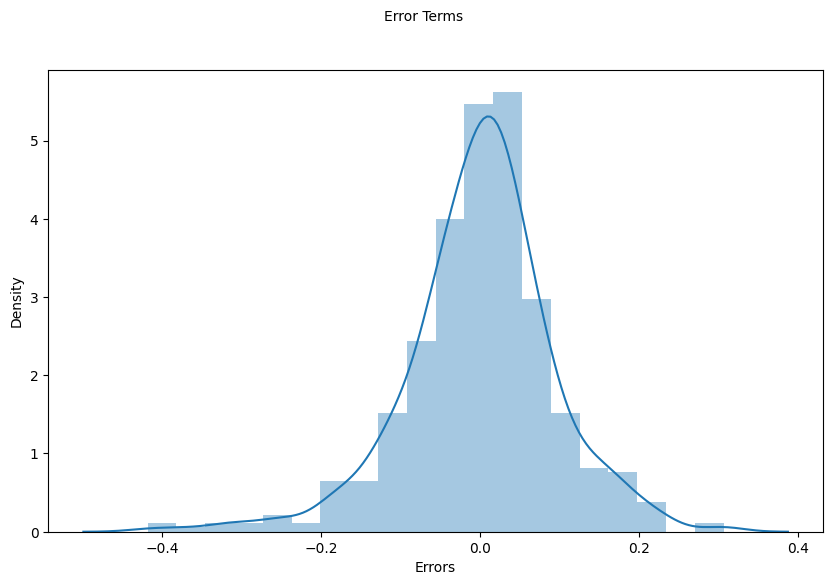

In [69]:
# Plot the histogram of the error terms

fig = plt.figure(figsize=(10, 6))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 10) 
plt.xlabel('Errors', fontsize = 10)

By looking at the above graph we can conclude that the Error terms are following normal distribution

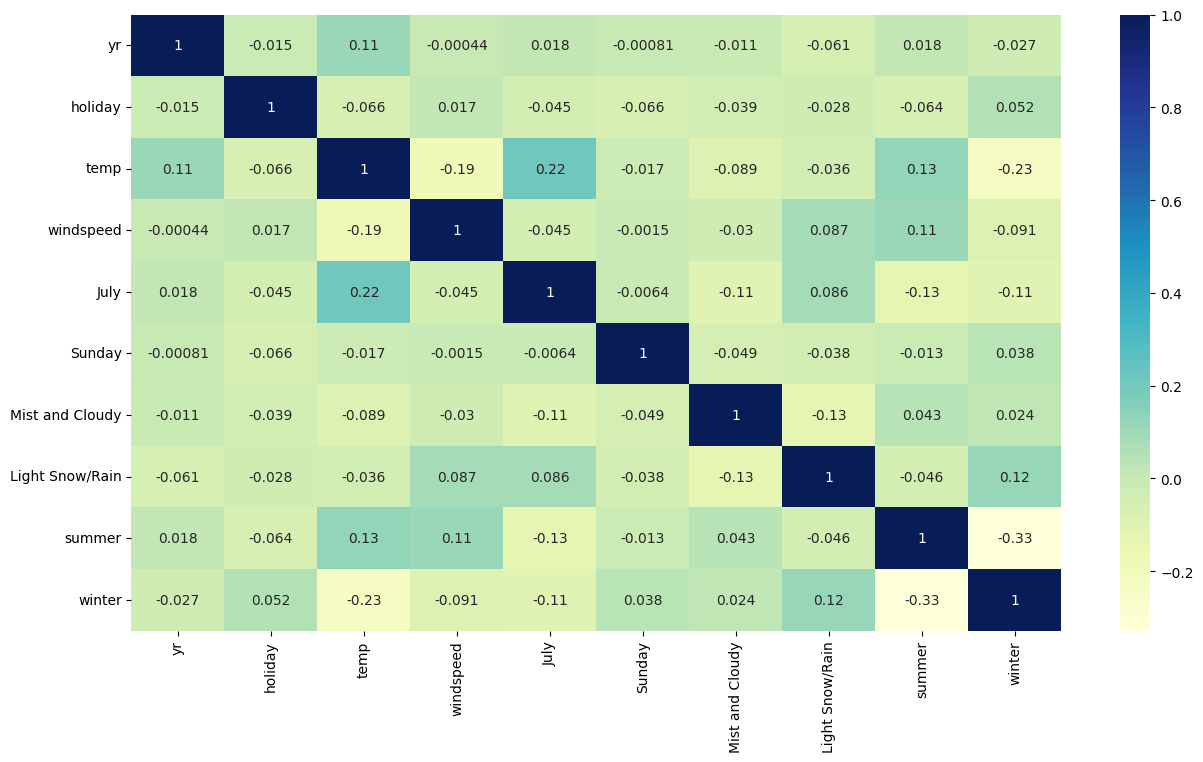

In [70]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="YlGnBu")
plt.show()

### STEP 8 - Model Predicitions

#### R-Squared value for train predictions

#### calculate the R-squared score on the train set

In [71]:
r2_score(y_train,y_train_pred)

0.8251746970210287

#### calculate the R-squared score on the test set

In [72]:
y_test = df_test.pop('cnt')
X_test = df_test

In [73]:
col1 = X_train_new.columns
X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [74]:
y_pred = lr_6.predict(X_test_lm_6)

In [75]:
# Find out the R squared value between test and predicted test data sets.
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7875

#### Step -9 Model Evaluation 

Text(0, 0.5, 'y_pred')

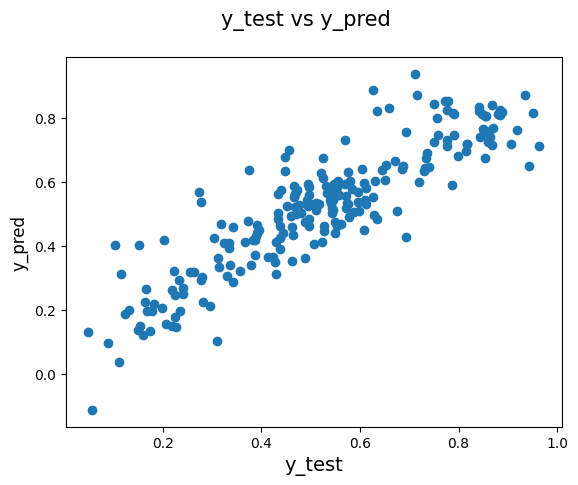

In [76]:
# Plotting scatter plot for the y_test and y_pred
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

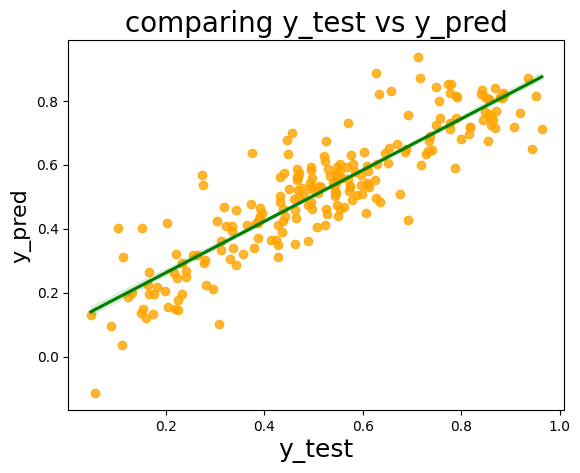

In [77]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "orange"}, line_kws={"color": "green"})
plt.title('comparing y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [78]:
# Building Final model
X_test_lm = sm.add_constant(X_test[col1])
lr = sm.OLS(y_test,X_test_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     84.02
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           1.35e-67
Time:                        22:23:40   Log-Likelihood:                 199.76
No. Observations:                 220   AIC:                            -377.5
Df Residuals:                     209   BIC:                            -340.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0673      0.029     

### Conclusion:-
     - Siginificant variables to predict the demand for the shared bikes are 
          - yr
          - holiday
          - temp
          - windespeed
          - Month(July)
          - Weathersit(Mist and Cloudy, Light Snow/Rain)
          - Season( summer, winter)
          - weekend day( Sunday)
          